In [1]:
print('Hello World')

Hello World


**Continuity:**

\begin{equation}
\frac{\partial (\rho A)}{\partial t} + \rho A \frac{\partial V}{\partial x} + \rho V \frac{\partial A}{\partial x} + V A \frac{\partial \rho}{\partial x} = 0
\end{equation}

**Momentum:**

\begin{equation}
\rho \frac{\partial V}{\partial t} + \rho V \frac{\partial V}{\partial x} = -R \bigg( \rho \frac{\partial T}{\partial x} + T \frac{\partial \rho}{\partial x} \bigg)
\end{equation}

**Energy:**

\begin{equation}
\rho c_{\nu} \frac{\partial T}{\partial t} + \rho V c_{\nu} \frac{\partial T}{\partial x} = - \rho R T \bigg[ \frac{\partial V}{\partial x} + V \frac{\partial (\ln A)}{\partial x} \bigg]
\end{equation}

### Nondimensional Variables

Anderson notes that as a matter of convention, nondimensional variables are generally used for analysis of flow in a nozzle. Accordingly, we introduce the appropriate nondimensional variables. Later they will be substituted into the governing equations above (Equations **7.42**, **7.43**, and **7.44** in Anderson's reference).

Temperature $\boldsymbol{T}$ relates to the nondimensional $\boldsymbol{T'}$.
\begin{equation}
T' = \frac{T}{T_0}
\end{equation}

Density $\boldsymbol{\rho}$ relates to the nondimensional $\boldsymbol{\rho'}$.
\begin{equation}
\rho' = \frac{\rho}{\rho_0}
\end{equation}

Position $\boldsymbol{x}$ relates to the nondimensional $\boldsymbol{x'}$.
\begin{equation}
x' = \frac{x}{L}
\end{equation}

The speed of sound in the reservoir is denoted $\boldsymbol{a_0}$.
\begin{equation}
a_0 = \sqrt{\gamma R T_0}
\end{equation}

Velocity $\boldsymbol{V}$ relates to the nondimensional $\boldsymbol{V'}$.
\begin{equation}
V' = \frac{V}{a_0}
\end{equation}

Time $\boldsymbol{t}$ relates to the nondimensional $\boldsymbol{t'}$.
\begin{equation}
t' = \frac{t}{\frac{L}{a_0}}
\end{equation}

Area $\boldsymbol{A}$ relates to the nondimensional $\boldsymbol{A'}$.
\begin{equation}
A' = \frac{A}{A^*}
\end{equation}

### Governing Equations with Nondimensional Variables

The nondimensional variables are substituted into the governing equations above (Equations **7.42**, **7.43**, and **7.44** in Anderson's reference). The equations are simplified, and the result is a new set of governing equations that use just the nondimensional variables.

**Continuity:**

\begin{equation}
\frac{\partial \rho'}{\partial t'} = -\rho' \frac{\partial V'}{\partial x'} - \rho' V' \frac{\partial (\ln A')}{\partial x'} - V' \frac{\partial \rho'}{\partial x'}
\end{equation}

**Momentum:**

\begin{equation}
\frac{\partial V'}{\partial t'} = -V' \frac{\partial V'}{\partial x'} - \frac{1}{\gamma} \bigg( \frac{\partial T'}{\partial x'} + \frac{T'}{\rho'} \frac{\partial \rho'}{\partial x'} \bigg)
\end{equation}

**Energy:**

\begin{equation}
\frac{\partial T'}{\partial t'} = -V' \frac{\partial T'}{\partial x'} - (\gamma - 1) T' \bigg[ \frac{\partial V'}{\partial x'} + V' \frac{\partial (\ln A')}{\partial x'} \bigg]
\end{equation}

In Anderson's reference, these are Equations **7.46**, **7.48**, and **7.50**.

## Numerical Solution of the Governing Equations using MacCormack's Method

Our approach begins with discretization of the space inside the nozzle into a grid of points. Recall that the governing equations were derived with the assumption of uniform flow properties (density, velocity, temperature, etc.) across any given cross section of the nozzle. Therefore, the grid is simply a line a points.

<img src='discretization.png'>

The figure above depicts the discretization. **Point 1** corresponds to the reservoir, and **Point N** corresponds to the nozzle exit. The grid points are evenly spaced, with a distance $\boldsymbol{\Delta x}$ between points.

This figure corresponds to **Figure 7.5** in Anderson's reference.

### MacCormack's Method: Predictor Step

The spatial derivatives in the governing equations are replaced with forward differences.

**Note:** For simplicity, we no longer use the prime notation for nondimensional variables. It is understood that all of the variables are nondimensional.

\begin{equation}
\bigg( \frac{\partial \rho}{\partial t} \bigg)^t_i = -\rho^t_i \ \frac{V^t_{i+1} - V^t_i}{\Delta x} - \rho^t_i \ V^t_i \ \frac{\ln A_{i+1} - \ln A_i}{\Delta x} - V^t_i \ \frac{\rho^t_{i+1} - \rho^t_i}{\Delta x}
\end{equation}
 
\begin{equation}
\bigg( \frac{\partial V}{\partial t} \bigg)^t_i = -V^t_i \ \frac{V^t_{i+1} - V^t_i}{\Delta x} - \frac{1}{\gamma} \bigg( \frac{T^t_{i+1} - T^t_i}{\Delta x} + \frac{T^t_i}{\rho^t_i} \ \frac{\rho^t_{i+1} - \rho^t_i}{\Delta x} \bigg)
\end{equation}
 
\begin{equation}
\bigg( \frac{\partial T}{\partial t} \bigg)^t_i = -V^t_i \ \frac{T^t_{i+1} - T^t_i}{\Delta x} - (\gamma - 1) T^t_i \bigg( \frac{V^t_{i+1} - V^t_i}{\Delta x} + V^t_i \ \frac{\ln A_{i+1} - \ln A_i}{\Delta x} \bigg)
\end{equation}

In Anderson's reference, these are equations **7.51**, **7.52**, and **7.53**.

Predicted values of $\boldsymbol{\rho}$, $\boldsymbol{V}$, and $\boldsymbol{T}$ are denoted $\boldsymbol{\overline{\rho}}$, $\boldsymbol{\overline{V}}$, and $\boldsymbol{\overline{T}}$.

\begin{equation}
\overline{\rho}^{\ t+\Delta t}_{\ i} = \rho^t_i + \bigg( \frac{\partial \rho}{\partial t} \bigg)^t_i \ \Delta t
\end{equation}

\begin{equation}
\overline{V}^{\ t+\Delta t}_{\ i} = V^t_i + \bigg( \frac{\partial V}{\partial t} \bigg)^t_i \ \Delta t
\end{equation}

\begin{equation}
\overline{T}^{\ t+\Delta t}_{\ i} = T^t_i + \bigg( \frac{\partial T}{\partial t} \bigg)^t_i \ \Delta t
\end{equation}

In Anderson's reference, these are equations **7.54**, **7.55**, and **7.56**.

### MacCormack's Method: Corrector Step

The spatial derivatives in the governing equations are replaced with backward differences. The predicted values $\boldsymbol{\overline{\rho}}$, $\boldsymbol{\overline{V}}$, and $\boldsymbol{\overline{T}}$ are used in the equations.

\begin{equation}
\bigg( \frac{\partial\overline{\rho}}{\partial t} \bigg)^{t+\Delta t}_i = -\overline{\rho}^{\ t+\Delta t}_{\ i} \ \frac{\overline{V}^{\ t+\Delta t}_{\ i} - \overline{V}^{\ t+\Delta t}_{\ i-1}}{\Delta x} - \overline{\rho}^{\ t+\Delta t}_{\ i} \ \overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\ln A_i - \ln A_{i-1}}{\Delta x} - \overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\overline{\rho}^{\ t+\Delta t}_{\ i} - \overline{\rho}^{\ t+\Delta t}_{\ i-1}}{\Delta x}
\end{equation}

\begin{equation}
\bigg( \frac{\partial\overline{V}}{\partial t} \bigg)^{t+\Delta t}_i = -\overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\overline{V}^{\ t+\Delta t}_{\ i} - \overline{V}^{\ t+\Delta t}_{\ i-1}}{\Delta x} - \frac{1}{\gamma} \bigg( \frac{\overline{T}^{\ t+\Delta t}_{\ i} - \overline{T}^{\ t+\Delta t}_{\ i-1}}{\Delta x} + \frac{\overline{T}^{\ t+\Delta t}_{\ i}}{\overline{\rho}^{\ t+\Delta t}_{\ i}} \ \frac{\overline{\rho}^{\ t+\Delta t}_{\ i} - \overline{\rho}^{\ t+\Delta t}_{\ i-1}}{\Delta x} \bigg)
\end{equation}

\begin{equation}
\bigg( \frac{\partial\overline{T}}{\partial t} \bigg)^{t+\Delta t}_i = -\overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\overline{T}^{\ t+\Delta t}_{\ i} - \overline{T}^{\ t+\Delta t}_{\ i-1}}{\Delta x} - (\gamma - 1) \  \overline{T}^{\ t+\Delta t}_{\ i} \bigg( \frac{\overline{V}^{\ t+\Delta t}_{\ i} - \overline{V}^{\ t+\Delta t}_{\ i-1}}{\Delta x} + \overline{V}^{\ t+\Delta t}_{\ i} \ \frac{\ln A_i - \ln A_{i-1}}{\Delta x} \bigg)
\end{equation}

In Anderson's reference, these are equations **7.57**, **7.58**, and **7.59**.

The time derivatives in the predictor step are averaged with the time derivatives in the corrector step.

\begin{equation}
\bigg( \frac{\partial \rho}{\partial t} \bigg)_{av} = \frac{1}{2} \ \bigg[ \bigg( \frac{\partial \rho}{\partial t} \bigg)^t_i + \bigg( \frac{\partial\overline{\rho}}{\partial t} \bigg)^{t+\Delta t}_i \bigg]
\end{equation}

\begin{equation}
\bigg( \frac{\partial V}{\partial t} \bigg)_{av} = \frac{1}{2} \ \bigg[ \bigg( \frac{\partial V}{\partial t} \bigg)^t_i + \bigg( \frac{\partial\overline{V}}{\partial t} \bigg)^{t+\Delta t}_i \bigg]
\end{equation}

\begin{equation}
\bigg( \frac{\partial T}{\partial t} \bigg)_{av} = \frac{1}{2} \ \bigg[ \bigg( \frac{\partial T}{\partial t} \bigg)^t_i + \bigg( \frac{\partial\overline{T}}{\partial t} \bigg)^{t+\Delta t}_i \bigg]
\end{equation}

In Anderson's reference, these are equations **7.60**, **7.61**, and **7.62**.

Finally, $\boldsymbol{\rho}$, $\boldsymbol{V}$, and $\boldsymbol{T}$ are found at $\boldsymbol{t+\Delta t}$.

\begin{equation}
\rho^{t+\Delta t}_i = \rho^t_i + \bigg( \frac{\partial \rho}{\partial t} \bigg)_{av} \Delta t
\end{equation}

\begin{equation}
V^{t+\Delta t}_i = V^t_i + \bigg( \frac{\partial V}{\partial t} \bigg)_{av} \Delta t
\end{equation}

\begin{equation}
T^{t+\Delta t}_i = T^t_i + \bigg( \frac{\partial T}{\partial t} \bigg)_{av} \Delta t
\end{equation}

In Anderson's reference, these are equations **7.63**, **7.64**, and **7.65**.

### Time Step

For stability, we use the following equation to determine $\boldsymbol{\Delta t}$.

\begin{equation}
\Delta t = C \ \frac{\Delta x}{a + V}
\end{equation}

Note that we are still using all nondimensional variables. $\boldsymbol{C}$ is the Courant number, and we use $\boldsymbol{C = 0.5}$.

At **time** $\boldsymbol{t}$ and **grid point** $\boldsymbol{i}$, we compute $\boldsymbol{\Delta t^t_i}$.

\begin{equation}
\Delta t^t_i = C \ \frac{\Delta x}{a^t_i + V^t_i}
\end{equation}

At **time** $\boldsymbol{t}$, a different value of $\boldsymbol{\Delta t^t_i}$ can be computed at each grid point. Therefore, we use the minimum across all grid points.

\begin{equation}
\Delta t^t = minimum(\Delta t^t_1, \Delta t^t_2,..., \Delta t^t_i,..., \Delta t^t_N)
\end{equation}

In Anderson's reference, these are equations **7.66**, **7.67**, and **7.69**.

### Boundary Conditions

Our grid has two boundaries - **Point 1** and **Point N**.

**Grid Point 1** is an inflow boundary. The density and temperature are fixed to the reservoir values, $\boldsymbol{\rho_0}$ and $\boldsymbol{T_0}$. The nondimensional values are $\boldsymbol{\rho^t_1 = 1}$ and $\boldsymbol{T^t_1 = 1}$. The velocity is found by linear extrapolation of **Grid Points 2** and **3**.

\begin{equation}
\rho^t_1 = 1
\end{equation}

\begin{equation}
V^t_1 = 2 V^t_2 - V^t_3
\end{equation}

\begin{equation}
T^t_1 = 1
\end{equation}

**Grid Point N** is an outflow boundary. Density, velocity, and temperature are all found by linear extrapolation.

\begin{equation}
\rho^t_N = 2 \rho^t_{N-1} - \rho^t_{N-2}
\end{equation}

\begin{equation}
V^t_N = 2 V^t_{N-1} - V^t_{N-2}
\end{equation}

\begin{equation}
T^t_N = 2 T^t_{N-1} - T^t_{N-2}
\end{equation}

In Anderson's reference, these are equations **7.70**, **7.71**, **7.72a**, **7.72b**, and **7.72c**.

### Nozzle Shape and Initial Conditions

Anderson uses the following equation to define the nozzle shape.

\begin{equation}
A = 1 + 2.2(x - 1.5)^2 \ \ \ \ \ 0 \le x \le 3
\end{equation}

Anderson uses the following equations to define the initial conditions.

\begin{equation}
\rho = 1 - 0.3146x
\end{equation}

\begin{equation}
T = 1 - 0.2314x
\end{equation}

\begin{equation}
V = (0.1 + 1.09x)T^{\frac{1}{2}}
\end{equation}

In Anderson's reference, these are equations **7.73**, **7.74a**, **7.74b**, and **7.74c**.

## Code

In [1]:
import numpy
from matplotlib import pyplot, rcParams
from scipy import optimize
%matplotlib inline
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
nx = 31                       # number of grid points
dx = 3/(nx-1)                 # grid spacing
x = numpy.linspace(0.,3.,nx)  # x grid

In [3]:
def compute_initial_conditions(x):
    '''Computes and returns the initial conditions for density, velocity, and temperature.
       Also computes and returns the area of the nozzle.
    
    Parameters:
    ----------
    x : 1D array of float
        x grid
    
    Returns:
    -------
    A : 1D array of float
        nozzle area
    rho : 1D array of float
          initial density
    V : 1D array of float
        initial velocity
    T : 1D array of float
        initial temperature
    '''
    
    A = 1 + 2.2 * (x - 1.5)**2
    
    rho = 1 - 0.3146 * x
    
    T = 1 - 0.2314 * x
    
    V = (0.1 + 1.09 * x) * numpy.sqrt(T)
    
    return A, rho, V, T

In [4]:
def solve_nozzle_flow(nt, nx, dx, A, rho, V, T):
    '''Solves the nozzle flow problem.
    
    Parameters:
    ----------
    nt : int
         number of time steps
    nx : int
         number of grid points
    dx : float
         grid spacing
    A : 1D array of float
        area at each grid point
    rho : 1D array of float
          density at each grid point
    V : 1D array of float
        velocity at each grid point
    T : 1D array of float
        temperature at each grid point
    
    Returns:
    -------
    t_n : 1D array of float
          array of time-step size
    rho_n : 2D array of float
            density array at each time step
    V_n : 2D array of float
          velocity array at each time step
    T_n : 2D array of float
          temperature array at each time step
    '''
    
    C = .5  # Courant number
    
    rho_dot_predictor = numpy.zeros(nx)
    V_dot_predictor = numpy.zeros(nx)
    T_dot_predictor = numpy.zeros(nx)
    
    rho_dot_corrector = numpy.zeros(nx)
    V_dot_corrector = numpy.zeros(nx)
    T_dot_corrector = numpy.zeros(nx)
    
    rho_next = numpy.zeros(nx)
    V_next = numpy.zeros(nx)
    T_next = numpy.zeros(nx)
    
    rho_n = numpy.zeros((nt,nx))
    V_n = numpy.zeros((nt,nx))
    T_n = numpy.zeros((nt,nx))
    
    t_n = numpy.zeros(nt)
    
    for t in range(nt):
        
        dt = numpy.amin(C * (dx/(numpy.sqrt(T) + V)))
        
        # MacCormack's Method: Predictor Step
        rho_dot_predictor[:-1] = -rho[:-1] * ((V[1:] - V[:-1])/dx) -\
                                  rho[:-1] * V[:-1] * ((numpy.log(A[1:]) - numpy.log(A[:-1]))/dx) -\
                                  V[:-1] * ((rho[1:] - rho[:-1])/dx)
        
        V_dot_predictor[:-1] = -V[:-1] * ((V[1:] - V[:-1])/dx) -\
                                (1/1.4) * (((T[1:] - T[:-1])/dx) +\
                                           (T[:-1]/rho[:-1]) * ((rho[1:] - rho[:-1])/dx))
        
        T_dot_predictor[:-1] = -V[:-1] * ((T[1:] - T[:-1])/dx) -\
                                (1.4-1) * T[:-1] * (((V[1:] - V[:-1])/dx) +\
                                                    V[:-1] * ((numpy.log(A[1:]) - numpy.log(A[:-1]))/dx))
        
        rho_predicted = rho.copy()
        V_predicted = V.copy()
        T_predicted = T.copy()
        
        rho_predicted[:-1] = rho[:-1] + rho_dot_predictor[:-1] * dt
        
        V_predicted[:-1] = V[:-1] + V_dot_predictor[:-1] * dt
        
        T_predicted[:-1] = T[:-1] + T_dot_predictor[:-1] * dt
        
        
        # MacCormack's Method: Corrector Step
        rho_dot_corrector[1:] = -rho_predicted[1:] * ((V_predicted[1:] - V_predicted[:-1])/dx) -\
                                 rho_predicted[1:] * V_predicted[1:] *\
                                 ((numpy.log(A[1:]) - numpy.log(A[:-1]))/dx) -\
                                 V_predicted[1:] * ((rho_predicted[1:] - rho_predicted[:-1])/dx)
        
        V_dot_corrector[1:] = -V_predicted[1:] * ((V_predicted[1:] - V_predicted[:-1])/dx) -\
                               (1/1.4) * (((T_predicted[1:] - T_predicted[:-1])/dx) +\
                                          (T_predicted[1:]/rho_predicted[1:]) *\
                                          ((rho_predicted[1:] - rho_predicted[:-1])/dx))
        
        T_dot_corrector[1:] = -V_predicted[1:] * ((T_predicted[1:] - T_predicted[:-1])/dx) -\
                               (1.4-1) * T_predicted[1:] *\
                               (((V_predicted[1:] - V_predicted[:-1])/dx) +\
                                V_predicted[1:] * ((numpy.log(A[1:]) - numpy.log(A[:-1]))/dx))
        
        rho_dot_average = .5 * (rho_dot_predictor + rho_dot_corrector)
        
        V_dot_average = .5 * (V_dot_predictor + V_dot_corrector)
        
        T_dot_average = .5 * (T_dot_predictor + T_dot_corrector)
        
        rho_next[1:-1] = rho[1:-1] + rho_dot_average[1:-1] * dt
        
        V_next[1:-1] = V[1:-1] + V_dot_average[1:-1] * dt
        
        T_next[1:-1] = T[1:-1] + T_dot_average[1:-1] * dt
        
        
        # Boundary Conditions
        # inflow
        rho_next[0] = 1
        V_next[0] = 2 * V_next[1] - V_next[2]
        T_next[0] = 1
        
        # outflow
        rho_next[-1] = 2 * rho_next[-2] - rho_next[-3]
        V_next[-1] = 2 * V_next[-2] - V_next[-3]
        T_next[-1] = 2 * T_next[-2] - T_next[-3]
        
        
        # Update data containers
        rho = rho_next.copy()
        V = V_next.copy()
        T = T_next.copy()
        
        rho_n[t] = rho.copy()
        V_n[t] = V.copy()
        T_n[t] = T.copy()
        
        t_n[t] = dt
    
    return t_n, rho_n, V_n, T_n

In [5]:
nt = 1400  # number of time-steps

A, rho_i, V_i, T_i = compute_initial_conditions(x)

t_n, rho_n, V_n, T_n = solve_nozzle_flow(nt, nx, dx, A, rho_i.copy(), V_i.copy(), T_i.copy())

In [6]:
rho = rho_n[-1]
V = V_n[-1]
T = T_n[-1]
p = rho * T

In [7]:
import nozzle_flow_analytical_solution

In [8]:
M_an, p_an, rho_an, T_an = nozzle_flow_analytical_solution.nozzle_flow_analytical_solution(x, A)

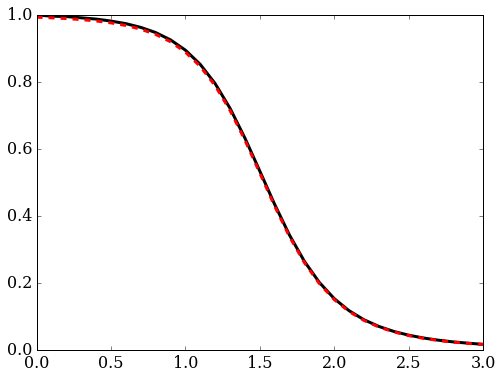

In [9]:
pyplot.figure(figsize=(8,6))
pyplot.plot(x, p, color='k', ls='-', lw=3)
pyplot.plot(x, p_an, color='r', ls='--', lw=3)